<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/CNN_for_Multiple_Noise_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo simples de classificação de tipo de ruido em imagens

#### Luis Ricardo Arantes Filho
#### Luan Bingo

Gerador de Ruidos: Rubens Sautter:
An parameter of correction has been used (s):
FFT(f(w)) = gauss(0,std) * (1/w^beta)^(beta*s/2) 
Frequencies are measured in multidimensional space by the frequency euclidian distance.

Parameter for all noise types
size = 128
wn = cNoise(0,(size,size),maxCorrections=100,maxAvgError=0.001, eta=0.05)

#### Coordenador: Dr. Reinaldo R. Rosa
#### National Institute for Space Research

# Import Noise Function



In [ ]:
%%capture
! git clone https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau.git

In [ ]:
%cd Noisy-Complex-Ginzburg-Landau/

/content/Noisy-Complex-Ginzburg-Landau


In [ ]:
#import the cNoise function
import cNoise as cNoise

In [ ]:
#%cd /content

In [ ]:
#Generating several colored noise from `cNoise` mudule
%%capture 
size = 128
noise = []
beta  = []
for j in range(0,2):
  for i in range(0,3):
    noise.append(cNoise.cNoise(i/10,(size,size),maxCorrections=100,maxAvgError=0.001, eta=0.05))
    beta.append(i/10)
import pandas as pd
df_data = pd.DataFrame({'image_data':noise, 'class':beta})

In [ ]:
import pandas as pd
df_data = pd.DataFrame({'image_data':noise, 'class':beta})
df_data.to_csv('2DFFT_noise.csv')

In [ ]:
new_data = pd.read_csv('2DFFT_noise.csv',dtype=object)


In [ ]:
import numpy as np
luan = np.array(new_data['image_data'].replace('\n  ',',').replace('\n ',',').replace('\n',',').replace('  ',',').replace('  ',',').replace(' ',','))

In [ ]:
type(new_data['image_data'][0])

str

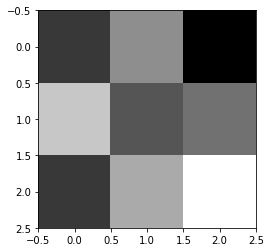

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
image1 = [[1,4,-1],
          [6,2,3],
          [1,5,8]]
plt.imshow(image1,cmap='gray')          


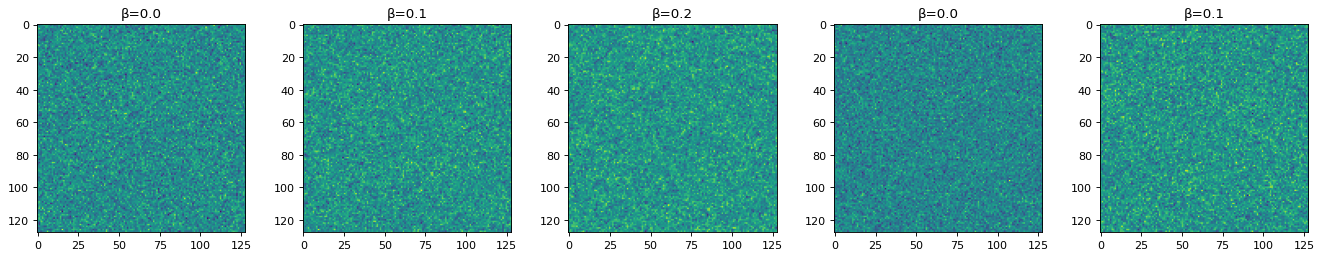

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

#Ploting the the Noise Chart

figure(figsize=(25, 20), dpi=80)
for i in range(len(noise)-1):
  plt.subplot(5,6,i+1)
  plt.title('β='+str(df_data['class'][i]))
  plt.imshow(df_data['image_data'][i])
#plt.savefig('Multiple Noise.pdf')
plt.show()


TypeError: ignored

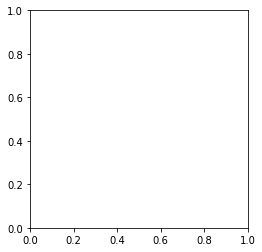

In [ ]:

plt.imshow(luan,cmap='gray')

plt.show()


# Reading Images 

We will generate the dataset that we will use for classification in the convolutional neural network. We will use Rubens Sauter's code to generate these noises in two dimensions. We will generate 31 noise classes. And we will generate a total of 100 218x218 images per class. As this code is very time consuming, we will generate the images and host them on google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#ls
%cd drive/MyDrive/INPE/CCN_For_Noise_Classification

Mounted at /content/drive
/content/drive/MyDrive/INPE/CCN_For_Noise_Classification


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

#Dataframes devem conter:
    #Imagens Full
    #Class
#caminho de images
path_img_1 = os.getcwd() + '/Noise_images/'

#lista de images
lista_p1 = os.listdir(path_img_1)
lista_p1.sort()

# =============================================================================
# #reading noise images
# =============================================================================
list_img = []
list_class = []

i = 0
for i in range(len(lista_p1)):
    image = cv2.imread(path_img_1+lista_p1[i])
    nome = lista_p1[i].split('.jpg')
    nome = nome[0].split('_')
    classe_noise = nome[3]
#     print(i)
#     print(classe_noise)

    list_img.append(image)
    list_class.append(classe_noise)

df_rect_1 = pd.DataFrame({'image_data':list_img, 'class':list_class})

In [ ]:
#testing changing variables
df_rect_1 = df_data

NameError: ignored

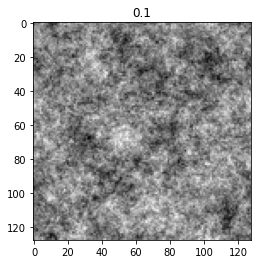

In [ ]:
i = 1
plt.imshow(df_rect_1['image_data'][i],cmap='gray')
plt.title(df_rect_1['class'][i])
plt.show()

# GENERATE SETS

In [ ]:
#Why save this dataframe
path_dataframe = os.getcwd() + '/Dataframes'
##Salvar esse DF       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'/'+nomeArquivo, compression='infer')


salvaDataFrames_pkl(df_rect_1,path_dataframe,'Data_Frame_Noise_images.pkl')

In [ ]:
#ADJUST IMG DIM
from PIL import Image
import cv2 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
image_list = []
i = 0
for i in range(len(df_rect_1)):
    print(i)
    #old_im = cv2.imread(df_rect_1.loc[i,'image_data'])    
    res = cv2.resize(df_rect_1.loc[i,'image_data'],(128,128),cv2.INTER_AREA)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY) #Whay put on gray?
    print(gray.shape)
    image_list.append(gray)
    print(i)

0


SystemError: ignored

In [ ]:
labels = []
i=0
for i in range(len(df_rect_1.index)):
    #(0-white noise, 1-pink noise, 2- red noise)
    if df_rect_1.loc[i,'class'] == 0.0:
        labels.append(0)
    elif df_rect_1.loc[i,'class'] == 0.1:
        labels.append(1)
    elif df_rect_1.loc[i,'class'] == 0.2:
        labels.append(2)

labels = np.array(labels)

In [ ]:
np.asarray(image_list)

array([], dtype=float64)

# Spliting traing and test data sets

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

'''
Montar Conjunto de Treinamento - Testes IMAGENS ARTIFICIAIS
'''
#Dividindo Conjunto de treinamento e de Teste
X_train, X_test, y_train, y_test = train_test_split(
    np.asarray(image_list),
    np.asarray(labels/10),
    test_size=0.20, 
    shuffle=True,
    random_state=42,
)

# Scale images to the [0, 1] range
# X_train = X_train.reshape(len(X_train),128,128,1) 
# X_test = X_test.reshape(len(X_test),128,128,1)

# X_train = X_train.astype('float32')/255
# X_test = X_test.astype('float32')/255
# print(X_train.shape)


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, 3)
# y_test = keras.utils.to_categorical(y_test, 3)

ValueError: ignored

In [ ]:
#Settings the train and test data 
path_datasets = os.getcwd() + '/Sets/'

np.save(path_datasets + 'X_train.npy', X_train)
np.save(path_datasets + 'X_test.npy', X_test)
np.save(path_datasets + 'y_train.npy', y_train)
np.save(path_datasets + 'y_test.npy', y_test)

In [ ]:
## TRAINING STEP
path_model = os.getcwd() + '/Model/'

# CNN Model

In [ ]:
'''
# =============================================================================
# NEURAL MODEL - CONVOLUTIONAL NEURAL NETWORK - SIMPLE - RETURNS POINTS (X,Y)
# =============================================================================
'''
from keras import layers
from keras import models
from keras import optimizers
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
#from keras.utils import multi_gpu_model
#from tensorflow.keras.utils import multi_gpu_model

'''
# =============================================================================
# TESTANDO OUTRAS ABORDAGENS -- O MELHOR MODELO - TEST 1
#=============================================================================
'''
model = keras.Sequential(
    [
        keras.Input(shape=(128,128,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(3, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_mse:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

In [ ]:
def salvarmodelo(nome,modelo):
    #Salvando
    filename = nome+'.sav'
    pickle.dump(modelo, open(filename, 'wb'))
    

def salvardicionario(nome, history):
    #Salvando Dicionario
    w = csv.writer(open(nome+".csv", "w"))
    for key, val in history.items():
        w.writerow([key, val])    
        
#Estatisticas do modelo
#cria dicionario
history_dict = history.history
history_dict.keys()
#Salvando Dicionario
salvardicionario(path_model+"History_noise_class",history_dict)
model.save(path_model+"Cnn_model_noise_class.h5")

In [ ]:
## VERIFY STATS AND TRAINING
def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

def abreDataFramecsv(caminho,nomeArq):
    dataFrame = pd.read_csv(caminho + nomeArq,names=['Metrics','Values'])#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame


In [ ]:
#ConvNet_1D_ARQ1_MULTIFILTRO
nome_History = 'History_noise_class.csv'
nome_Model = "Cnn_model_noise_class.h5"

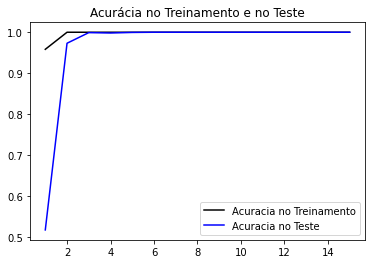

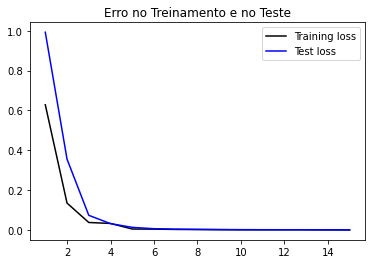

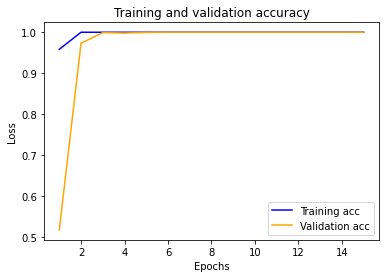

In [ ]:
'''
Plotando as Curvas de Validação e de Erro - Aprendizado do Modelo
'''
history = abreDataFramecsv(path_model, nome_History)
#history = history.to_dict()
acc = history.loc[3,'Values']
val_acc = history.loc[1,'Values']
loss = history.loc[2,'Values']
val_loss = history.loc[0,'Values']

from ast import literal_eval

acc = literal_eval(acc)
val_acc = literal_eval(val_acc)
loss = literal_eval(loss)
val_loss = literal_eval(val_loss)


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,'k', label='Acuracia no Treinamento')
plt.plot(epochs, val_acc, 'b', label='Acuracia no Teste')
plt.title('Acurácia no Treinamento e no Teste')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'k', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Erro no Treinamento e no Teste')
plt.legend()
plt.show()
 
plt.figure()
acc_values = acc
val_acc_values = val_acc
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc_values, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
'''
# =============================================================================
# COMPUTANDO ESTATISTICAS
# =============================================================================
'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve

def computaStats_Classification(modelo,nome,X_a,y_a):
    print("Estatisticas do Modelo - "+nome)
    #predição
    y_pred = modelo.predict([X_a])
    y_true = y_a
    #Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    #Convert validation observations to one hot vectors
    Y_true = np.argmax(y_a,axis = 1) 
    #MEAN SQUARE ERROR
    
    print("Erro medio quadratico: ", mean_squared_error(Y_true, Y_pred_classes))
    
    #Acurácia
    print("Acuracia: ", accuracy_score(Y_true, Y_pred_classes))
    
    #Precisão
    print("Precisao: ", precision_score(Y_true, Y_pred_classes,average=None))
    
    #Recall
    print("Recall: ", recall_score(Y_true, Y_pred_classes,average=None))
    
    #F1 - Score
    print("F1 -Score: ", f1_score(Y_true, Y_pred_classes,average=None))
    

computaStats_Classification(model,'ConvNet_Noise_Class - Treino',X_train,y_train)
# print("--------**********-------------***********---------------**************")
computaStats_Classification(model,'ConvNet_Noise_Class - Testes',X_test,y_test)

Estatisticas do Modelo - ConvNet_Noise_Class - Treino
Erro medio quadratico:  0.0
Acuracia:  1.0
Precisao:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 -Score:  [1. 1. 1.]
Estatisticas do Modelo - ConvNet_Noise_Class - Testes
Erro medio quadratico:  0.0
Acuracia:  1.0
Precisao:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 -Score:  [1. 1. 1.]


In [ ]:
a

NameError: ignored